<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/lesson4_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TABULAR DATA+**

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.tabular import *

**Tabular data should be in a Pandas Datafraame**

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = 'salary'
cat_names = ['workclass','education', 'marital-status', 'occupation', 'relationship','race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [18]:
df[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path,cat_names=cat_names)

In [0]:
data = (TabularList.from_df(df,path=path, cat_names=cat_names,cont_names=cont_names, procs=procs)
          .split_by_idx(list(range(800,1000)))
          .label_from_df(cols=dep_var)
          .add_test(test)
          .databunch())

In [21]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Self-emp-not-inc,Bachelors,Never-married,Exec-managerial,Not-in-family,White,False,2.8889,1.1997,1.1422,>=50k
Self-emp-inc,HS-grad,Never-married,Craft-repair,Other-relative,White,False,-0.8493,1.9927,-0.4224,<50k
Private,Some-college,Married-civ-spouse,Sales,Husband,White,False,-0.1163,-0.2730,-0.0312,<50k
Private,Some-college,Never-married,Sales,Not-in-family,White,False,-0.6294,0.2276,-0.0312,>=50k
State-gov,HS-grad,Married-civ-spouse,Other-service,Husband,Black,False,0.5434,0.4639,-0.4224,>=50k
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,False,1.2763,-0.1645,-0.4224,<50k
Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,0.9831,-0.4078,1.1422,>=50k
Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,0.6899,-1.3499,1.5334,>=50k
Private,Some-college,Never-married,Sales,Own-child,White,False,-1.1425,-1.0166,-0.0312,<50k
Private,Assoc-acdm,Divorced,Prof-specialty,Not-in-family,White,False,0.3968,0.0811,0.7511,<50k


In [0]:
learn = tabular_learner(data,layers=[200,100], metrics=accuracy)

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


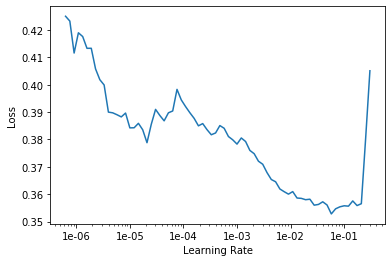

In [27]:
learn.recorder.plot()

In [31]:
learn.fit(3,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.350153,0.375651,0.840000,00:05
1,0.348151,0.368560,0.845000,00:05
2,0.337905,0.369961,0.840000,00:05


**Inference**

In [0]:
row = df.iloc[0]

In [35]:
row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [34]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4801, 0.5199]))